# EDA 2


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load the dataset
df = pd.read_csv('movies.csv')
df

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0
...,...,...,...,...,...,...,...,...,...,...,...
5801,Fine Wine,MOVIE,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0
5802,Edis Starlight,MOVIE,2021,NaN,74,"['music', 'documentation']",[],NaN,NaN,NaN,NaN
5803,Clash,MOVIE,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0
5804,Shadow Parties,MOVIE,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0


In [5]:
# Get basic Information
# to check data types, non-null counts, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 5805 non-null   object 
 1   type                  5806 non-null   object 
 2   release_year          5806 non-null   int64  
 3   age_certification     3196 non-null   object 
 4   runtime               5806 non-null   int64  
 5   genres                5806 non-null   object 
 6   production_countries  5806 non-null   object 
 7   seasons               2047 non-null   float64
 8   imdb_id               5362 non-null   object 
 9   imdb_score            5283 non-null   float64
 10  imdb_votes            5267 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 499.1+ KB


In [6]:
# describe() is for numerical columns (mean, standard deviation, quartiles, etc.).
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes
count,5806.000000,5806.000000,2047.000000,5283.000000,5.267000e+03
mean,2016.013434,77.643989,2.165608,6.533447,2.340719e+04
std,7.324883,39.474160,2.636207,1.160932,8.713432e+04
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00
25%,2015.000000,44.000000,1.000000,5.800000,5.210000e+02
50%,2018.000000,84.000000,1.000000,6.600000,2.279000e+03
75%,2020.000000,105.000000,2.000000,7.400000,1.014400e+04
max,2022.000000,251.000000,42.000000,9.600000,2.268288e+06


In [7]:
# head() ------> View the first few rows or (E.g. using df.head(10) view first 10 rows)
df.head(10)

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0
5,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,72895.0
6,Dirty Harry,MOVIE,1971,R,102,"['thriller', 'crime', 'action']",['US'],NaN,tt0066999,7.7,153463.0
7,My Fair Lady,MOVIE,1964,G,170,"['drama', 'music', 'romance', 'family']",['US'],NaN,tt0058385,7.8,94121.0
8,The Blue Lagoon,MOVIE,1980,R,104,"['romance', 'drama']",['US'],NaN,tt0080453,5.8,69053.0
9,Bonnie and Clyde,MOVIE,1967,R,110,"['drama', 'crime', 'action']",['US'],NaN,tt0061418,7.7,111189.0


In [8]:
# df.shape -----> to check the amount of rows and columns.
df.shape

(5806, 11)

In [9]:
# to count missing values in each column.
df.isnull().sum()

,0
title,1
type,0
release_year,0
age_certification,2610
runtime,0
genres,0
production_countries,0
seasons,3759
imdb_id,444
imdb_score,523


In [10]:
# duplicate value
df.duplicated().sum()

np.int64(0)

In [13]:
# age_certification check

df_r =df[df['age_certification']=="R"]
df_pg = df[df['age_certification']=="PG"]
print(df_r.shape)
print(df_pg.shape)

(575, 11)
(246, 11)


In [14]:
# check the column imdb_score
df_r['imdb_score']

,imdb_score
1,8.3
3,8.0
4,8.1
6,7.7
8,5.8
...,...
5692,5.2
5704,5.4
5713,7.0
5720,NaN


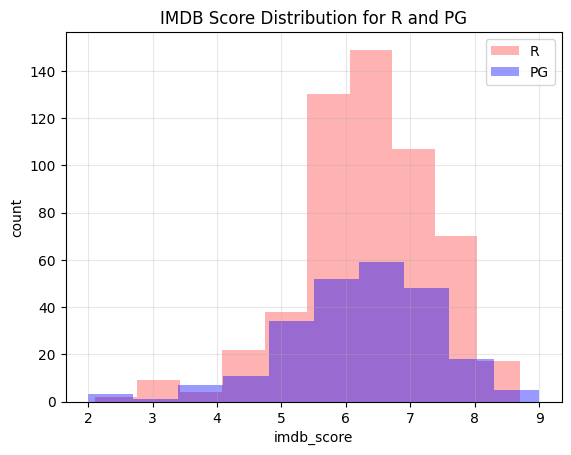

In [25]:
# Histogram Graph for "IMDB Score Distribution for R and PG"

plt.hist(df_r['imdb_score'],color = 'red',alpha = 0.3,label = "R")
plt.hist(df_pg['imdb_score'],color = 'blue',alpha = 0.4, label = "PG")
plt.xlabel('imdb_score')
plt.ylabel('count')
plt.title('IMDB Score Distribution for R and PG')
plt.legend()
plt.grid(alpha = 0.3)
#plt.show()

In [26]:
# find and display all the unique values present in the 'type'

df['type'].unique()

array(['SHOW', 'MOVIE'], dtype=object)

In [34]:
# Range of years in the dataset!!

df['release_year'].min()
df['release_year'].max()
print("The range of years in the dataset is", df['release_year'].max() - df['release_year'].min())

The range of years in the dataset is 77


In [40]:
# how many movies have the runtime more than 100 minutes!!
df[(df['type']=="MOVIE") & (df['runtime']>100)].shape[0]

1723

In [41]:
# find and display all the unique values present in the 'age_certification'
df['age_certification'].unique()

array(['TV-MA', 'R', 'PG', 'TV-14', 'G', 'PG-13', nan, 'TV-PG', 'TV-Y',
       'TV-G', 'TV-Y7', 'NC-17'], dtype=object)

In [44]:
# how many TV-14 certified Show do we have?

df[(df['type']=="SHOW") & (df['age_certification']=="TV-14")].shape[0]

470

In [47]:
# How many movies or shows, are there with the genre "Comedy"

df[df['genres'].str.contains('comedy')].shape[0]

2269

In [48]:
#how many comedy movies are there in the dataset?😃

df[(df['type']=="MOVIE") & (df['genres'].str.contains('comedy'))].shape[0]

1543